<a href="https://colab.research.google.com/github/Gameto2025/Desafio_AluraStore/blob/main/Desafio_AluraStore__mapas_extras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Analisis Extra: Situacion Geografica de Tiendas.



In [ ]:
# Calcular los ingresos por lugar de compra.

import pandas as pd

urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

tiendas = [pd.read_csv(url) for url in urls]

for df in tiendas:
    df.columns = df.columns.str.strip()

for i, df in enumerate(tiendas, 1):
    df['Tienda'] = f"Tienda {i}"

df = pd.concat(tiendas, ignore_index=True)

df = df.dropna(subset=['Lugar de Compra', 'Precio'])

# Agrupar por tienda y lugar de compra, y calcular los ingresos totales por cada lugar de compra
ingresos_por_lugar = df.groupby(['Tienda', 'Lugar de Compra']).agg(
    Ingresos=('Precio', 'sum')
).reset_index()

print(ingresos_por_lugar)


      Tienda Lugar de Compra     Ingresos
0   Tienda 1         Armenia    4615700.0
1   Tienda 1    Barranquilla   32907700.0
2   Tienda 1          Bogotá  440005000.0
3   Tienda 1     Bucaramanga   17579200.0
4   Tienda 1            Cali  154493700.0
..       ...             ...          ...
71  Tienda 4        Riohacha   23684700.0
72  Tienda 4     Santa Marta   13218600.0
73  Tienda 4          Soacha    3149000.0
74  Tienda 4      Valledupar    1057000.0
75  Tienda 4   Villavicencio    1586600.0

[76 rows x 3 columns]


In [ ]:
import pandas as pd

# Cambiar la configuración de pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Leer el archivo CSV
ingresos_por_lugar = pd.read_csv('ingresos_por_lugar_compras.csv')

# Mostrar todo el DataFrame
print(ingresos_por_lugar)

      Tienda Lugar de Compra     Ingresos
0   Tienda 1         Armenia    4615700.0
1   Tienda 1    Barranquilla   32907700.0
2   Tienda 1          Bogotá  440005000.0
3   Tienda 1     Bucaramanga   17579200.0
4   Tienda 1            Cali  154493700.0
5   Tienda 1       Cartagena   22296700.0
6   Tienda 1          Cúcuta   37879500.0
7   Tienda 1         Inírida    2722500.0
8   Tienda 1         Leticia   14669800.0
9   Tienda 1       Manizales    8027600.0
10  Tienda 1        Medellín  296858100.0
11  Tienda 1           Neiva    3494000.0
12  Tienda 1           Pasto   14996400.0
13  Tienda 1         Pereira   56214300.0
14  Tienda 1        Riohacha   18512700.0
15  Tienda 1     Santa Marta   13198300.0
16  Tienda 1          Soacha    4126000.0
17  Tienda 1      Valledupar    1121300.0
18  Tienda 1   Villavicencio    7161900.0
19  Tienda 2         Armenia    3363200.0
20  Tienda 2    Barranquilla   27741300.0
21  Tienda 2          Bogotá  479959200.0
22  Tienda 2     Bucaramanga   238

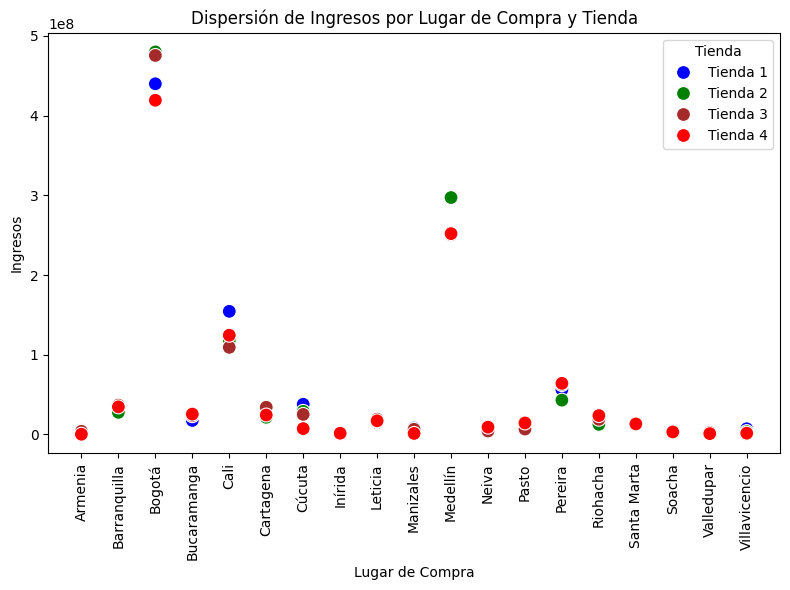

In [ ]:
# Graficar los ingresos por lugar de compra en grafico de dispersion.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colores_personalizados = {
    'Tienda 1': 'blue',
    'Tienda 2': 'green',
    'Tienda 3': 'brown',
    'Tienda 4': 'red'
}
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ingresos_por_lugar, x='Lugar de Compra', y='Ingresos', hue='Tienda', palette=colores_personalizados, s=100)

plt.title('Dispersión de Ingresos por Lugar de Compra y Tienda', fontsize=12)
plt.xlabel('Lugar de Compra', fontsize=10)
plt.ylabel('Ingresos', fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

En este grafico de dispersion se observa claramente que las mayores ventas y por consiguiente mayores ingresos, se obtienen en la ciudad de  Bogotá, para las cuatro tiendas. Luego, siguen las ciudades de Medellin y Cali. El resto de lugares de venta los ingresos son similares.

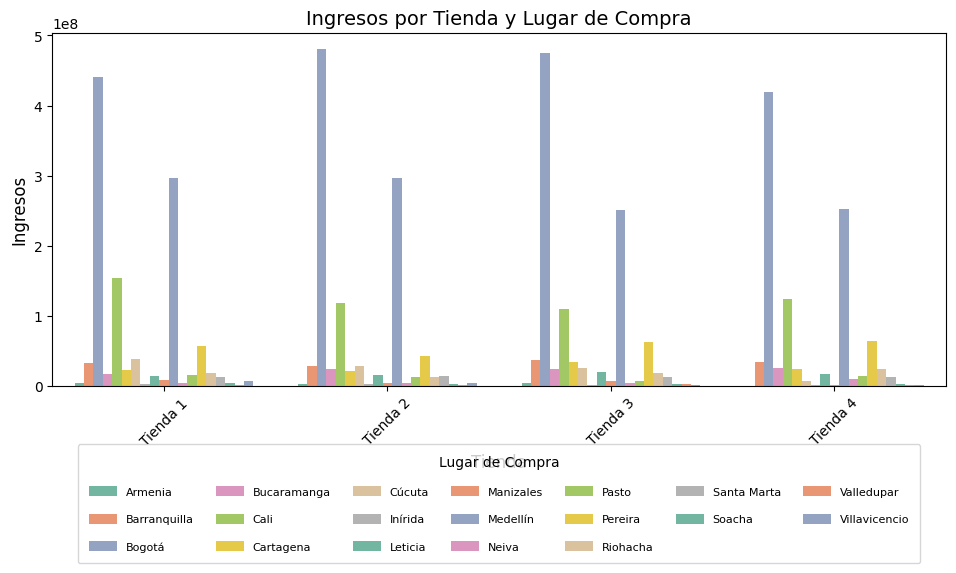

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=ingresos_por_lugar, x='Tienda', y='Ingresos', hue='Lugar de Compra', palette='Set2')

# Configuración de título y etiquetas
plt.title('Ingresos por Tienda y Lugar de Compra', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)
plt.xticks(rotation=45)

# Colocar la leyenda horizontal abajo
plt.legend(
    title='Lugar de Compra',
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    ncol=7,
    fontsize=8,          # Tamaño de la fuente
    handlelength=2.5,     # Largo de los íconos de los manejadores
    handleheight=1,       # Altura de los manejadores
    borderpad=1,          # Espacio entre el borde y el texto
    labelspacing=1.5,     # Espacio entre las entradas de la leyenda
    columnspacing=2       # Espacio entre las columnas de la leyenda
)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En este grafico se observan los ingresos por tienda y lugar de compra. Coincide con el grafico anterior, donde las tiendas tienen sus mayores ventas en las tres ciudades principales de Colombia, que son, Bogotá, Medellin y Cali.

In [ ]:
#Creacion de mapas de ventas y Heatmap.

import pandas as pd
import folium
from folium.plugins import HeatMap

urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

df = pd.concat([pd.read_csv(url).assign(Tienda=nombre) for url, nombre in zip(urls, nombres)], ignore_index=True)
df['Ventas'] = 1
df['Ingresos'] = df['Precio']

# Agrupar por ubicación
ventas_por_ubicacion = df.groupby(['lat', 'lon', 'Tienda'], as_index=False).agg({'Ventas': 'sum', 'Ingresos': 'sum'})

# Crea mapa de ventas.
mapa = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=5)
for _, row in ventas_por_ubicacion.iterrows():
    folium.CircleMarker(
        location=[row.lat, row.lon],
        radius=row.Ventas / 10,
        popup=f"<b>{row.Tienda}</b><br>Ventas: {row.Ventas}<br>Ingresos: ${row.Ingresos:.2f}",
        color='blue', fill=True, fill_opacity=0.4
    ).add_to(mapa)
mapa.save("mapa_ventas.html")

# Crear mapa de calor con intensidad por ingresos.
mapa_calor = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=4)

heat_data = df[['lat', 'lon', 'Ingresos']].dropna().values.tolist()

HeatMap(
    heat_data,
    max_zoom=10,
    radius=15,  # Ajusta según tus necesidades
    blur=10,    # Ajusta el difuminado
    min_opacity=0.4  # Ajusta la opacidad mínima
).add_to(mapa_calor)

mapa_calor.save("heatmap_ventas.html")

In [ ]:
#Descargar los mapas.
from google.colab import files
files.download('mapa_ventas.html')
files.download('heatmap_ventas.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import folium

# Cargar los datos desde las URLs
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Leer todas las tiendas
tiendas = [pd.read_csv(url) for url in urls]

# Agregar columna de nombre de tienda manualmente
for i, df in enumerate(tiendas, 1):
    df["Tienda"] = f"Tienda {i}"

# Combinar los DataFrames
df = pd.concat(tiendas, ignore_index=True)

# Asegurarse de que lat, lon y Precio estén correctos
df = df.dropna(subset=["lat", "lon", "Precio"])

# Agrupar por ubicación y tienda
rendimiento = df.groupby(['lat', 'lon', 'Tienda']).agg(
    Ventas=('Producto', 'count'),
    Ingresos=('Precio', 'sum')
).reset_index()

# Crear el mapa centrado en la ubicación promedio
mapa = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=6)

for _, row in rendimiento.iterrows():
    popup_text = f"""
    <b>{row['Tienda']}</b><br>
    Ventas: {row['Ventas']}<br>
    Ingresos: ${row['Ingresos']:.2f}
    """
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=6,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=250)
    ).add_to(mapa)

mapa.save("mapa_rendimiento.html")

In [ ]:
#Para descargar el mapa
from google.colab import files
files.download("mapa_rendimiento.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

En resumen y a lauzde esta informacion, creo que en vez de vender alguna tienda, seria mejorcerrar los lugares de compra con menor ventas.

Tambien otra medida puede ser mejorar politicas de atencion al cliente en las tiendas con menor evaluacion.

Sin embargo, repito lo del informe inicial que se necesitan mayores datos e informacion,, como el costo de operacion de cada tienda y cada lugar de compra, para obtener los mergenes de utilidades que genera cada tienda y cada lugar de compra.